In [182]:
!pip install --upgrade scikit-learn
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive
/content/drive/MyDrive


In [185]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hotel_bookings.csv')

In [186]:
df.shape

(119390, 32)

In [187]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#Data Cleaning

---




#1.Drop Colums with high Number of Null Values

In [188]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [189]:
#Columns company and agent have high no.of null values so we are dropping them
df.drop(['company','agent'],axis=1, inplace=True)

In [190]:
df.shape

(119390, 30)

#2.Fill Na Values

In [191]:
df['children'] =  df['children'].fillna(0)
df['country'] = df['country'].fillna(df['country'].mode().index[0])

In [192]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [193]:
df.shape

(119390, 30)

#3. Check for duplicates and drop(if any)

In [194]:
#checking for no.of duplicates
df.duplicated().sum()

32020

In [195]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [196]:
#Double check
df.duplicated().sum()

0

#4. Checking if there are any invalid bookings

In [197]:
#Bookings with no adults in them are invalid
len(df[df['adults'] == 0])

385

In [198]:
#drop these cols
df = df[df['adults'] != 0]

In [199]:
#double check
len(df[df['adults'] == 0])

0

#5. Mapping month strings to numbers

In [200]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)


#6.Replace values which have same meaning to one common value
(It is given that Undefined/SC – no meal package; So we are replacing Undefined/SC with SC)

In [201]:
df.loc[df['meal'] == 'Undefined', 'meal'] = 'SC'

#7. Convert dates to pandas format
(this allows for standard operations)

In [202]:
# Combine date columns into a single 'arrival_date' column
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str))

# Drop the 'arrival_date_week_number' column
df.drop(columns=['arrival_date_week_number'], inplace=True)

# Convert 'arrival_date' and 'reservation_status_date' columns to datetime
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


#8. Remove rows with ADR Zero or negative
(If zero or negative ADR values are inconsistent with the business model or unlikely to represent valid bookings, it makes sense to exclude them from the analysis.)

In [203]:
df.shape

(86985, 30)

In [204]:
df = df[df['adr'] > 0]

In [205]:
df.shape

(85347, 30)

#9. Remove stays with more that a year spent
(High chance of being invalid inputs)

In [206]:
lead_time_threshold = (1, 365)
df = df[(df['lead_time'] >= lead_time_threshold[0]) & (df['lead_time'] <= lead_time_threshold[1])]

In [207]:
df.shape

(79362, 30)

#10. Creating new colums for getting more insights

---



In [208]:
#Merged kids as a single column and recorded total nights stayed in the hotel
df['kids'] = df['children'] + df['babies']
df['family'] = np.where(df['kids'] > 0 , '1' , '0')

df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date', 'kids',
       'family', 'total_nights'],
      dtype='object')

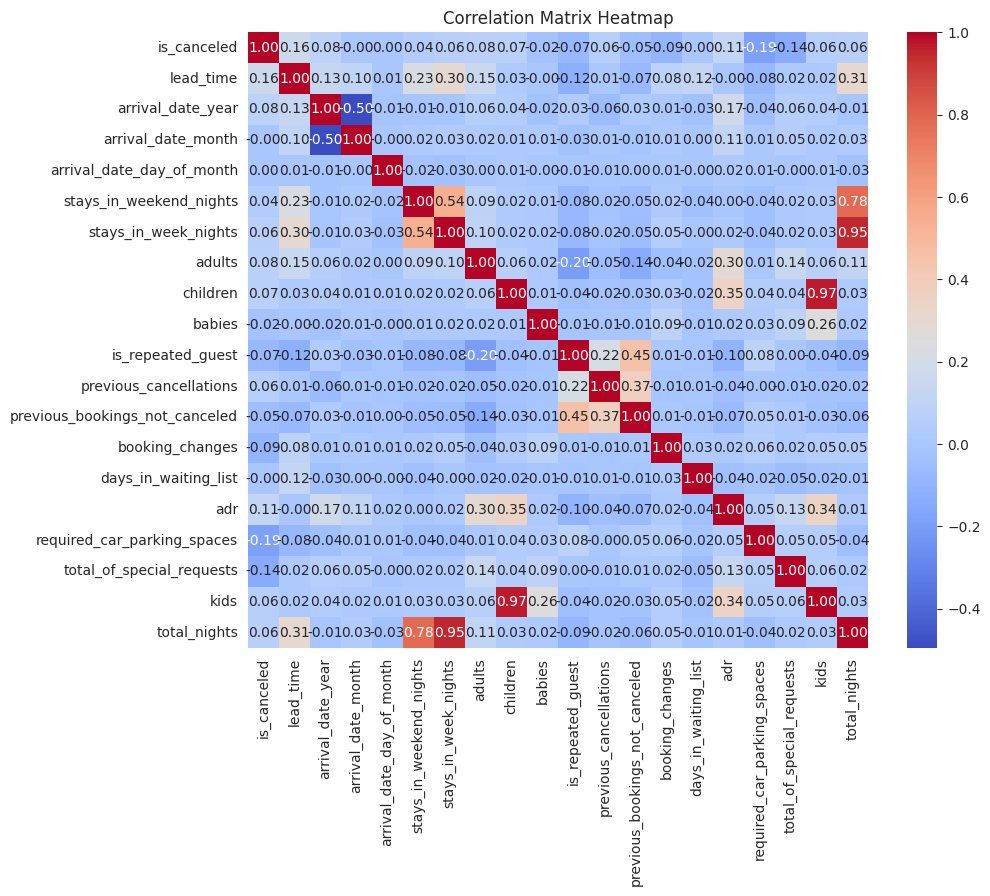

In [209]:
import seaborn as sns
cor_mat = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [210]:
newDF = df.copy()

#**EDA**

---



#1. Checking the head and tail of the dataset

In [211]:
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year  \
2  Resort Hotel            0          7               2015   
3  Resort Hotel            0         13               2015   
4  Resort Hotel            0         14               2015   
7  Resort Hotel            0          9               2015   
8  Resort Hotel            1         85               2015   

   arrival_date_month  arrival_date_day_of_month  stays_in_weekend_nights  \
2                   7                          1                        0   
3                   7                          1                        0   
4                   7                          1                        0   
7                   7                          1                        0   
8                   7                          1                        0   

   stays_in_week_nights  adults  children  ...  customer_type    adr  \
2                     1       1       0.0  ...      Transient   75.0   
3                   

In [212]:
print(df.tail())

             hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

        arrival_date_month  arrival_date_day_of_month  \
119385                   8                         30   
119386                   8                         31   
119387                   8                         31   
119388                   8                         31   
119389                   8                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
119385                        2                     5       2       0.0  ...   
119386                        2                     5       3       0.0  ...   
119387                    

We notice the values in the individual columns in the dataset, and size of the dataset is reduced by ~30% after the cleaning operations are performed on the dataset

#2.Describing the DataSet

In [213]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids,total_nights
count,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000,79362.000000
mean,0.292483,83.710416,2016.223873,6.488030,15.821867,1.059084,2.750573,1.902472,0.140269,0.010962,0.027179,0.028931,0.148824,0.264812,0.718001,109.931185,0.081172,0.726154,0.151231,3.809657
std,0.454906,81.214866,0.681970,3.048862,8.838100,1.033980,2.043150,0.487325,0.455814,0.115160,0.162607,0.367455,1.605162,0.707964,9.039205,53.585552,0.277132,0.837840,0.471660,2.743837
min,0.000000,1.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,17.000000,2016.000000,4.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,57.000000,2016.000000,7.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,1.000000,0.000000,3.000000
75%,1.000000,131.000000,2017.000000,9.000000,24.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.900000,0.000000,1.000000,0.000000,5.000000
max,1.000000,365.000000,2017.000000,12.000000,31.000000,19.000000,50.000000,4.000000,10.000000,10.000000,1.000000,26.000000,71.000000,18.000000,259.000000,5400.000000,8.000000,5.000000,10.000000,69.000000


**Pay per night**

In [214]:
# Separate Resort and City hotels
resort_hotel = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
city_hotel = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

# Calculate average prices per night and person
resort_avg_price = resort_hotel["adr"] / (resort_hotel["adults"] + resort_hotel["children"])
city_avg_price = city_hotel["adr"] / (city_hotel["adults"] + city_hotel["children"])

# Print the average prices
print(f"Average price per night and person for Resort Hotel: {resort_avg_price.mean():.2f} €")
print(f"Average price per night and person for City Hotel: {city_avg_price.mean():.2f} €")


Average price per night and person for Resort Hotel: 49.79 €
Average price per night and person for City Hotel: 60.32 €


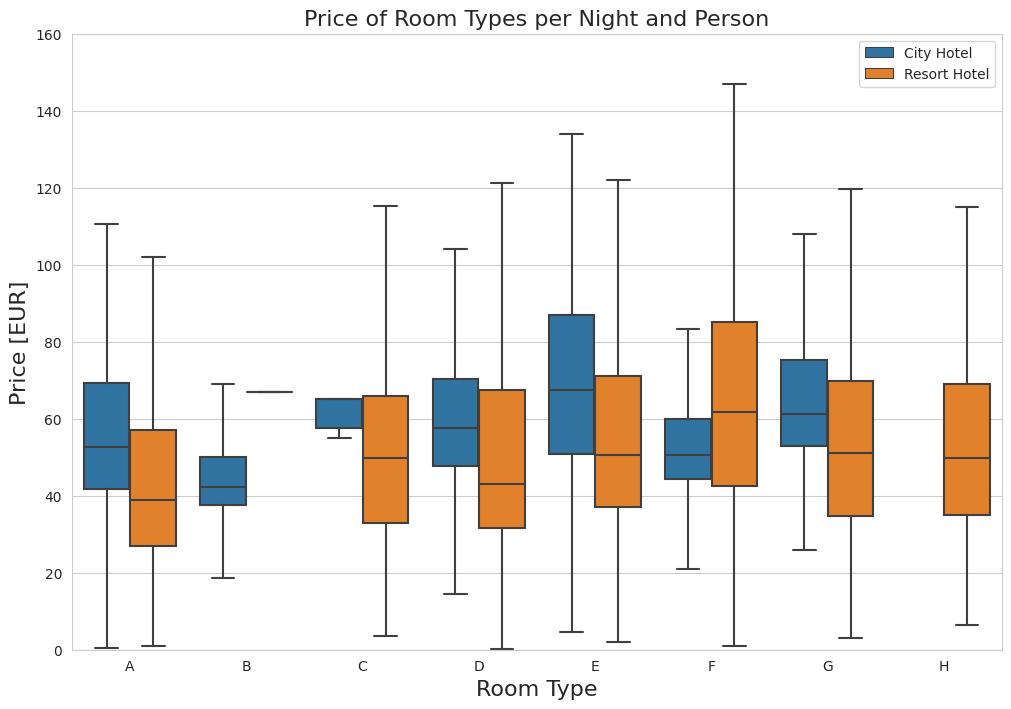

In [215]:
# Calculate normalized price per night (adr_pp)
df["adr_pp"] = df["adr"] / (df["adults"] + df["children"])

# Filter out only actual guests
full_data_guests = df.loc[df["is_canceled"] == 0]

# Extract relevant columns for room prices and sort by reserved room type
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# Create a boxplot for room prices
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices,
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of Room Types per Night and Person", fontsize=16)
plt.xlabel("Room Type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()


The above visualization displays the boxplot, providing insights into the price distribution for different room types and hotels

#Cancellation Rate VS Type of Hotel



In [216]:
import plotly.express as px

In [217]:
df["is_canceled"] = df["is_canceled"].map({1: "canceled", 0: "not canceled"})

fig = px.sunburst(
    df,
    title="<b>Cancellation Rate VS Type of Hotel<b>",
    path=["hotel", "is_canceled"],
    height=540,
    width=740,
)
fig.update_traces(
    textinfo="label+percent parent",
    insidetextorientation="horizontal",
    marker_line_width=7,
    textfont_size=13
)

fig.show()

In [218]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,kids,family,total_nights,adr_pp
2,Resort Hotel,not canceled,7,2015,7,1,0,1,1,0.0,...,75.00,0,0,Check-Out,2015-07-02,2015-07-01,0.0,0,1,75.000000
3,Resort Hotel,not canceled,13,2015,7,1,0,1,1,0.0,...,75.00,0,0,Check-Out,2015-07-02,2015-07-01,0.0,0,1,75.000000
4,Resort Hotel,not canceled,14,2015,7,1,0,2,2,0.0,...,98.00,0,1,Check-Out,2015-07-03,2015-07-01,0.0,0,2,49.000000
7,Resort Hotel,not canceled,9,2015,7,1,0,2,2,0.0,...,103.00,0,1,Check-Out,2015-07-03,2015-07-01,0.0,0,2,51.500000
8,Resort Hotel,canceled,85,2015,7,1,0,3,2,0.0,...,82.00,0,1,Canceled,2015-05-06,2015-07-01,0.0,0,3,41.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,not canceled,23,2017,8,30,2,5,2,0.0,...,96.14,0,0,Check-Out,2017-09-06,2017-08-30,0.0,0,7,48.070000
119386,City Hotel,not canceled,102,2017,8,31,2,5,3,0.0,...,225.43,0,2,Check-Out,2017-09-07,2017-08-31,0.0,0,7,75.143333
119387,City Hotel,not canceled,34,2017,8,31,2,5,2,0.0,...,157.71,0,4,Check-Out,2017-09-07,2017-08-31,0.0,0,7,78.855000
119388,City Hotel,not canceled,109,2017,8,31,2,5,2,0.0,...,104.40,0,0,Check-Out,2017-09-07,2017-08-31,0.0,0,7,52.200000


**Types of Hotels**

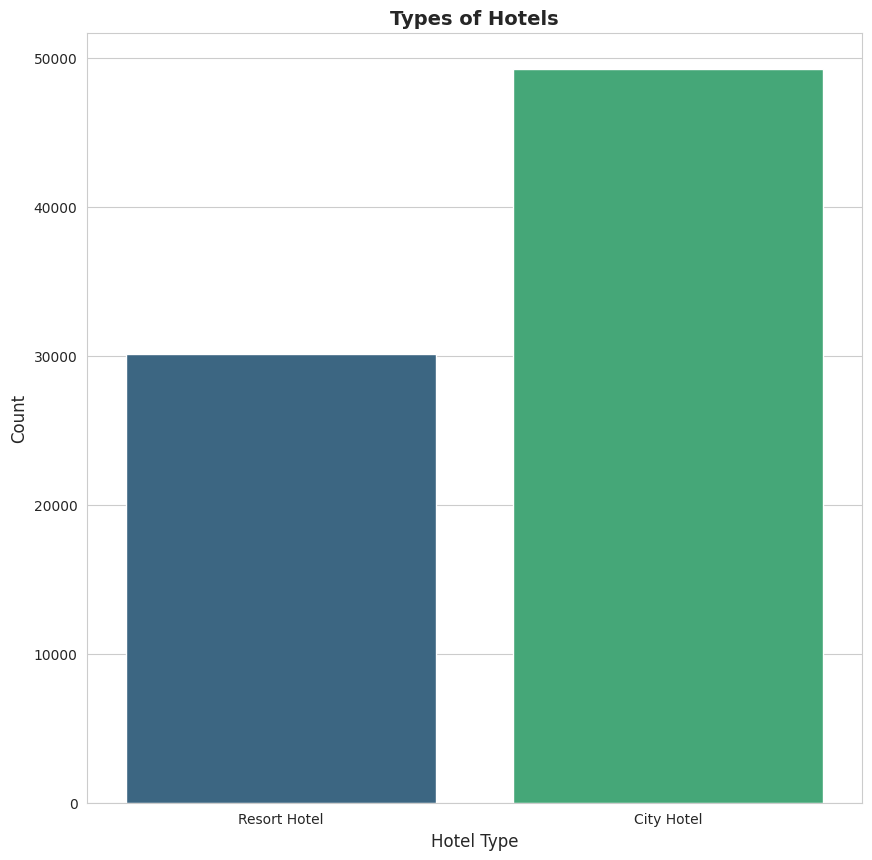

In [219]:
#Types of hotel

# Adjust the figure size
plt.figure(figsize=(10, 10))

# Create a countplot for hotel types with a different palette ('viridis')
sns.countplot(x='hotel', data=df, palette='viridis')

# Set the title and labels
plt.title('Types of Hotels', weight='bold', fontsize=14)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()


from the above graph we can see there are almost 30k resort hotels are present and around 48k+ city hotels are present.


**Arrival Month Graph**

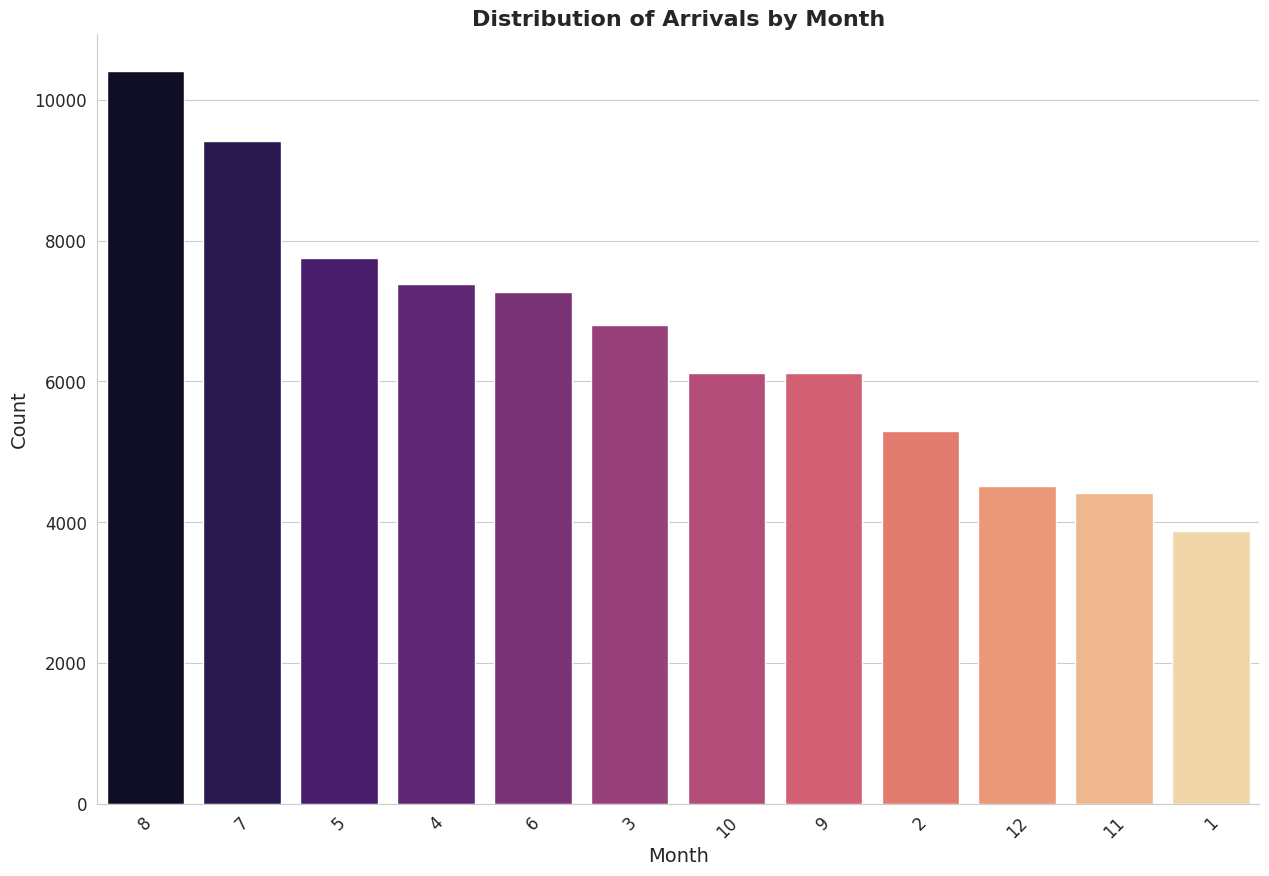

In [220]:
# Set the style
sns.set_style('whitegrid')

# Adjust the figure size
plt.figure(figsize=(15, 10))

# Create a countplot for arrival months, ordering them by frequency
sns.countplot(x='arrival_date_month', data=df,
              order=pd.value_counts(df['arrival_date_month']).index, palette='magma')

# Set the title and labels
plt.title('Distribution of Arrivals by Month', weight='bold', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add more ticks to x-axis for better readability
plt.xticks(rotation=45)

# Increase font size of tick labels
plt.tick_params(axis='both', labelsize=12)

# Remove top and right spines for cleaner appearance
sns.despine()

# Display the plot
plt.show()

The above  graph illustrates the booking trends across different months. Notably, August emerges as the peak month with the highest number of reservations, while January stands out as the least occupied month. Interestingly, January's booking activity is merely half as robust as that of August.

**Table of stay_in_weekend and stay_in_week_nights features**

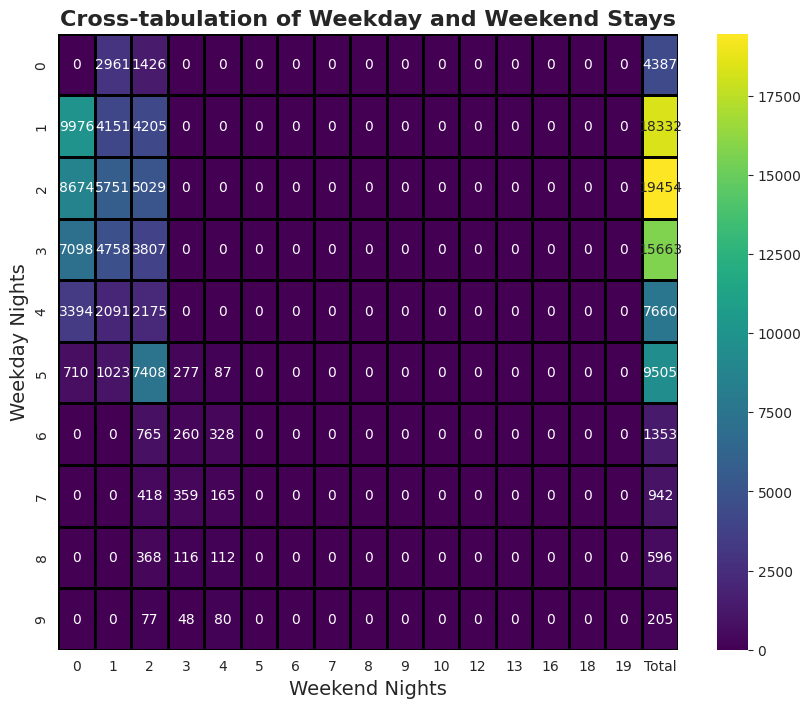

In [221]:
# Calculate the cross-tabulation
cross_tab = pd.crosstab(index=df['stays_in_week_nights'],
                        columns=df['stays_in_weekend_nights'],
                        margins=True, margins_name='Total').iloc[:10]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d', cbar=True, linewidths=1, linecolor='black')

# Set the title and labels
plt.title('Cross-tabulation of Weekday and Weekend Stays', weight='bold', fontsize=16)
plt.xlabel('Weekend Nights', fontsize=14)
plt.ylabel('Weekday Nights', fontsize=14)

# Show the plot
plt.show()

The table above highlights the correlation between two crucial time-related features: stays_in_week_nights and stays_in_weekend_night.

**Meal Feature pie chart**

In [222]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date', 'kids',
       'family', 'total_nights', 'adr_pp'],
      dtype='object')

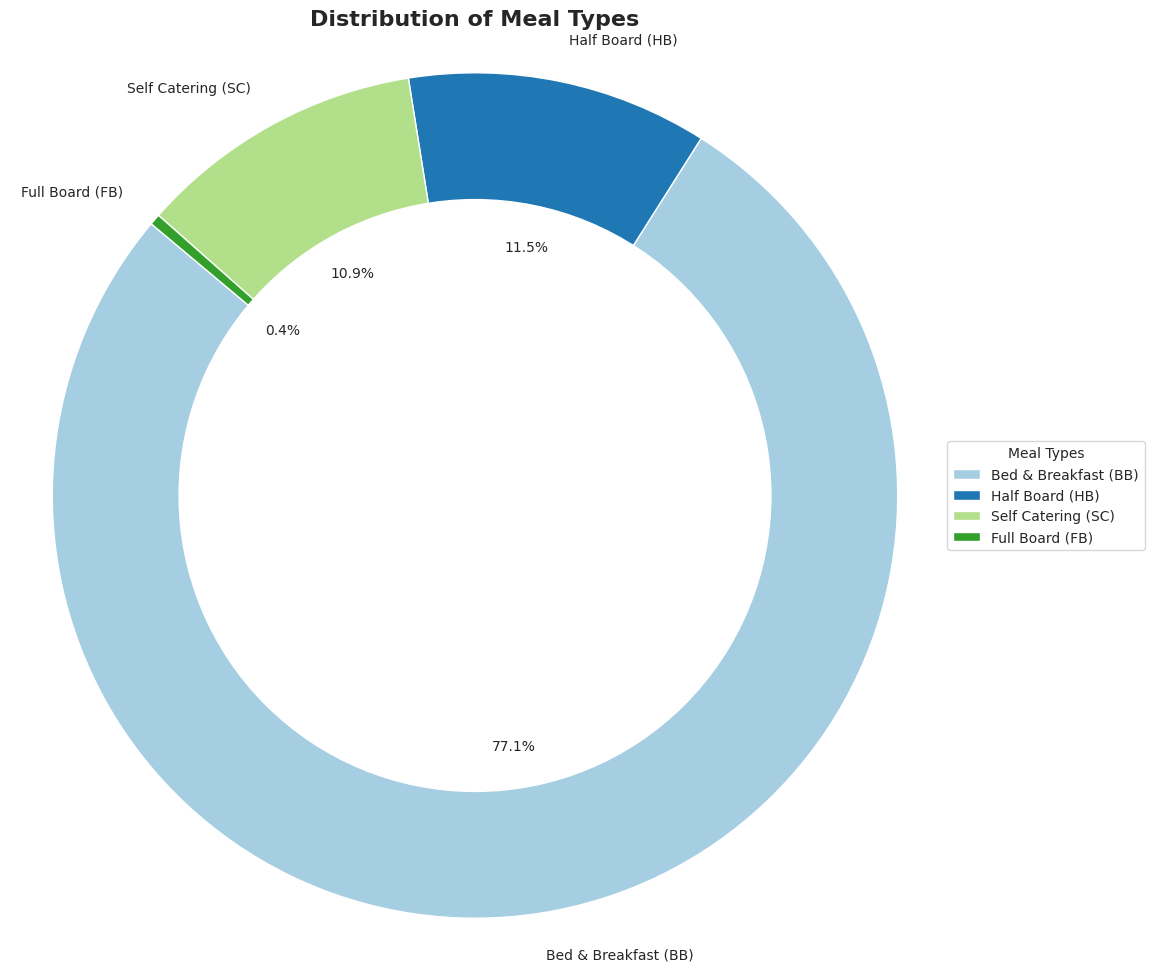

In [223]:
meal_labels = ['Bed & Breakfast (BB)', 'Half Board (HB)', 'Self Catering (SC)', 'Full Board (FB)']
size = df['meal'].value_counts()

plt.figure(figsize=(12, 12))

# Choose a color palette
colors = plt.cm.Paired(range(len(meal_labels)))

# Create the pie chart
wedges, texts, autotexts = plt.pie(size, labels=meal_labels, autopct='%1.1f%%', startangle=140, colors=colors)

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Add a legend
plt.legend(wedges, meal_labels,
          title="Meal Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Set the title
plt.title('Distribution of Meal Types', weight='bold', fontsize=16)

# Show the plot
plt.show()


The donut pie chart above illustrates the distribution of meal categories. Notably, there is a significant contrast between the 'Bed & Breakfast' category and the others. Nearly 80% of the bookings are allocated for 'Bed & Breakfast', indicating a substantial preference for this meal option.

**Creating new feature: Weekday vs Weekend**

In [224]:
# Disable warning for chained assignment
pd.options.mode.chained_assignment = None

# Define a function to categorize stays based on weekend and weekday nights
def categorize_stays(weekend_nights, weekday_nights):
    if weekend_nights == 0 and weekday_nights > 0:
        return 'stay_just_weekday'
    elif weekend_nights > 0 and weekday_nights == 0:
        return 'stay_just_weekend'
    elif weekend_nights > 0 and weekday_nights > 0:
        return 'stay_both_weekday_and_weekend'
    else:
        return 'undefined_data'

# Apply the categorization function to create a new feature
df['weekend_or_weekday'] = df.apply(lambda row: categorize_stays(row['stays_in_weekend_nights'], row['stays_in_week_nights']), axis=1)


**arrival_date_month vs weekend_or_weekday graph**

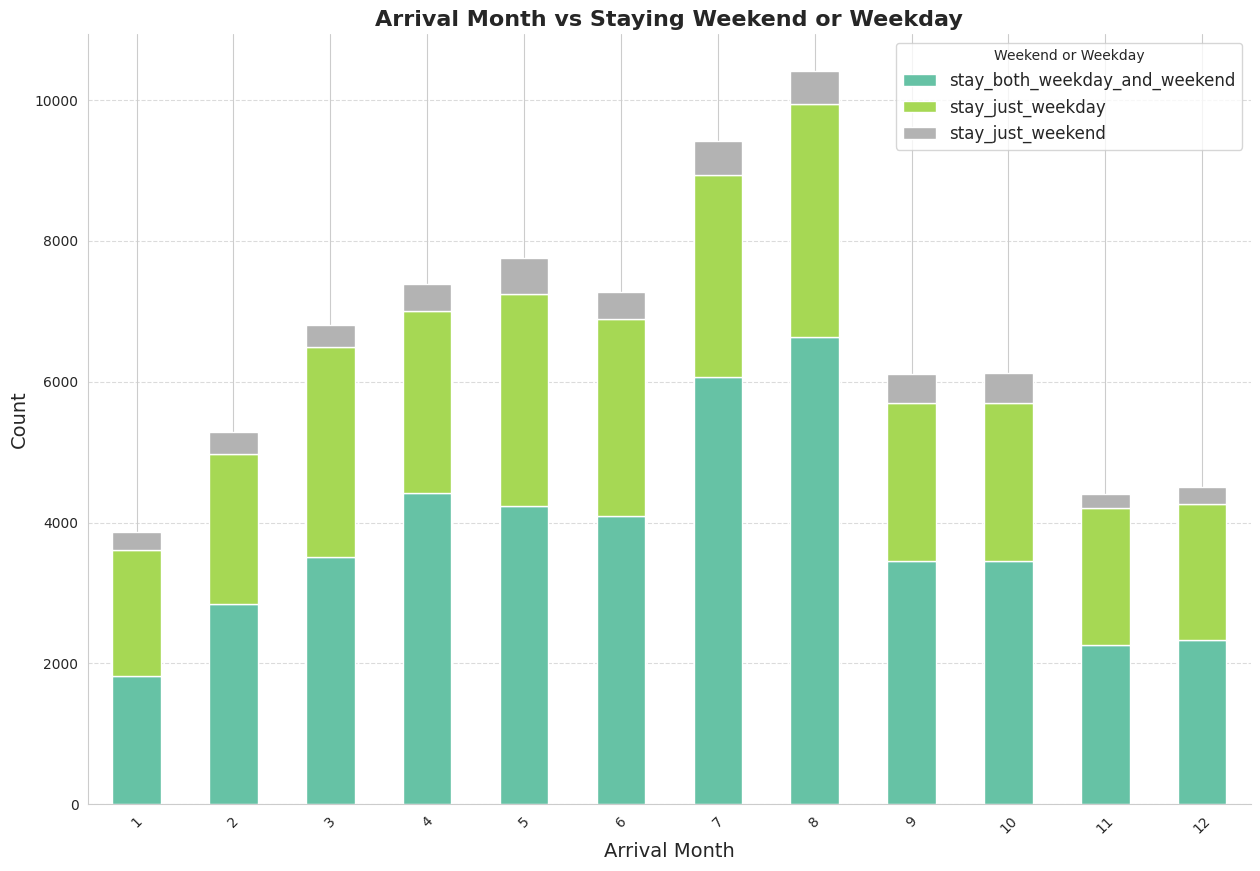

In [225]:
# Convert 'arrival_date_month' to integer
df['arrival_date_month'] = df['arrival_date_month'].astype('int64')

# Group the data by 'arrival_date_month' and 'weekend_or_weekday'
group_data = df.groupby(['arrival_date_month', 'weekend_or_weekday']).size().unstack(fill_value=0)

# Sort the data by 'arrival_date_month' in ascending order
group_data = group_data.sort_values('arrival_date_month', ascending=True)

# Create a stacked bar plot
ax = group_data.plot(kind='bar', stacked=True, cmap='Set2', figsize=(15, 10))

# Set the title and labels
plt.title('Arrival Month vs Staying Weekend or Weekday', weight='bold', fontsize=16)
plt.xlabel('Arrival Month', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend for clarity
plt.legend(title='Weekend or Weekday', fontsize=12)

# Beautify the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the right and top spines for a cleaner appearance
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()


The above bar graph depicts the relationship between the 'Weekend or Weekday' feature and the 'Arrival Date Month'. It is evident that the majority of bookings were made for stays that encompass both weekdays and weekends. In contrast, the number of bookings for exclusively weekend stays is notably lower compared to the other categories.

**Top 10 Countries of Origin**

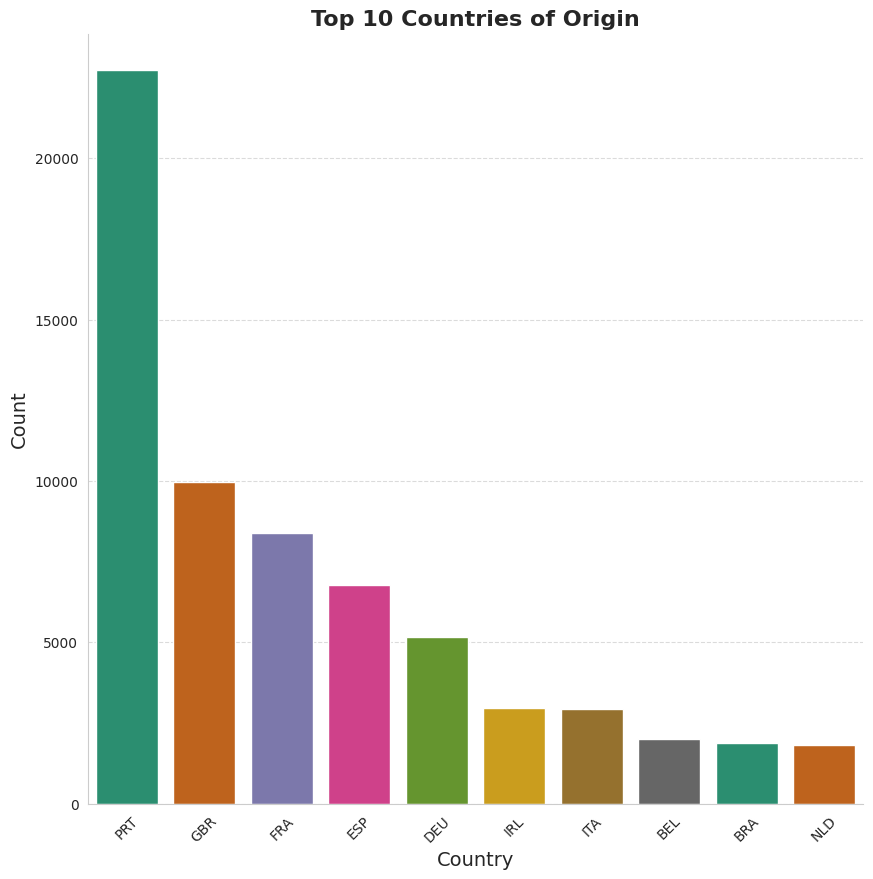

In [226]:
# Create a graph for the Top 10 Countries of Origin
plt.figure(figsize=(10,10))

# Generate the countplot, ordering by frequency of countries
sns.countplot(x='country', data=df,
              order=pd.value_counts(df['country']).iloc[:10].index, palette="Dark2")

# Set the title and labels
plt.title('Top 10 Countries of Origin', weight='bold', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add grid lines for reference
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines for a cleaner appearance
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


The graph above provides insights into the booking locations. It's evident that there's a notable contrast in booking distribution, with Portugal standing out prominently. Remarkably, Portugal accounts for approximately 24% of all bookings, signifying a significant concentration in this specific location.

**Group of total_of_special_requests and is_canceled features**

<Figure size 1000x1000 with 0 Axes>

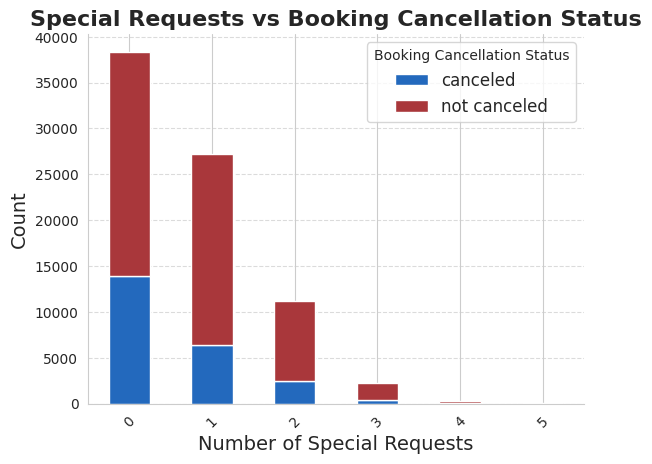

In [227]:
# Grouping by 'total_of_special_requests' and 'is_canceled' features
group_adr_request = df.groupby(['total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)

# Create a stacked bar plot
plt.figure(figsize=(10, 10))
ax = group_adr_request.plot(kind='bar', stacked=True, cmap='vlag')

# Set the title and labels
plt.title('Special Requests vs Booking Cancellation Status', weight='bold', fontsize=16)
plt.xlabel('Number of Special Requests', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend for clarity
plt.legend(title='Booking Cancellation Status', fontsize=12)

# Beautify the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()


The above graph illustrates the correlation between special requests and the status of booking cancellations. It is noteworthy that approximately half of the bookings made without any special requests were canceled, while the other half remained intact without any cancellations.

In [228]:
newDF.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,kids,family,total_nights
2,Resort Hotel,0,7,2015,7,1,0,1,1,0.0,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,0.0,0,1
3,Resort Hotel,0,13,2015,7,1,0,1,1,0.0,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,0.0,0,1
4,Resort Hotel,0,14,2015,7,1,0,2,2,0.0,...,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,0.0,0,2
7,Resort Hotel,0,9,2015,7,1,0,2,2,0.0,...,Transient,103.0,0,1,Check-Out,2015-07-03,2015-07-01,0.0,0,2
8,Resort Hotel,1,85,2015,7,1,0,3,2,0.0,...,Transient,82.0,0,1,Canceled,2015-05-06,2015-07-01,0.0,0,3


In [229]:
newDF

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,kids,family,total_nights
2,Resort Hotel,0,7,2015,7,1,0,1,1,0.0,...,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,0.0,0,1
3,Resort Hotel,0,13,2015,7,1,0,1,1,0.0,...,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,0.0,0,1
4,Resort Hotel,0,14,2015,7,1,0,2,2,0.0,...,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,0.0,0,2
7,Resort Hotel,0,9,2015,7,1,0,2,2,0.0,...,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-01,0.0,0,2
8,Resort Hotel,1,85,2015,7,1,0,3,2,0.0,...,Transient,82.00,0,1,Canceled,2015-05-06,2015-07-01,0.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,30,2,5,2,0.0,...,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,0.0,0,7
119386,City Hotel,0,102,2017,8,31,2,5,3,0.0,...,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,0.0,0,7
119387,City Hotel,0,34,2017,8,31,2,5,2,0.0,...,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,0.0,0,7
119388,City Hotel,0,109,2017,8,31,2,5,2,0.0,...,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,0.0,0,7


In [230]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

newDF.drop(useless_col, axis = 1, inplace = True)

In [231]:
newDF.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,kids,family,total_nights
2,Resort Hotel,0,7,7,1,0,1,1,0.0,0,...,No Deposit,Transient,75.0,0,0,2015-07-02,2015-07-01,0.0,0,1
3,Resort Hotel,0,13,7,1,0,1,1,0.0,0,...,No Deposit,Transient,75.0,0,0,2015-07-02,2015-07-01,0.0,0,1
4,Resort Hotel,0,14,7,1,0,2,2,0.0,0,...,No Deposit,Transient,98.0,0,1,2015-07-03,2015-07-01,0.0,0,2
7,Resort Hotel,0,9,7,1,0,2,2,0.0,0,...,No Deposit,Transient,103.0,0,1,2015-07-03,2015-07-01,0.0,0,2
8,Resort Hotel,1,85,7,1,0,3,2,0.0,0,...,No Deposit,Transient,82.0,0,1,2015-05-06,2015-07-01,0.0,0,3


In [232]:
cat_cols = [col for col in newDF.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'is_canceled',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'family']

In [233]:
cat_df = newDF[cat_cols]
cat_df.head()

,hotel,is_canceled,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,family
2,Resort Hotel,0,BB,Direct,Direct,A,No Deposit,Transient,0
3,Resort Hotel,0,BB,Corporate,Corporate,A,No Deposit,Transient,0
4,Resort Hotel,0,BB,Online TA,TA/TO,A,No Deposit,Transient,0
7,Resort Hotel,0,FB,Direct,Direct,C,No Deposit,Transient,0
8,Resort Hotel,1,BB,Online TA,TA/TO,A,No Deposit,Transient,0


In [234]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

In [235]:

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})




In [236]:
cat_df.head()

,hotel,is_canceled,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,family
2,0,0,0,0,0,1,0,0,0
3,0,0,0,1,1,1,0,0,0
4,0,0,0,2,2,1,0,0,0
7,0,0,1,0,0,0,0,0,0
8,0,1,0,2,2,1,0,0,0


In [237]:
num_df = newDF.drop(columns = cat_cols, axis = 1)
num_df

,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,kids,total_nights
2,7,7,1,0,1,1,0.0,0,0,0,0,75.00,0,0,2015-07-02,2015-07-01,0.0,1
3,13,7,1,0,1,1,0.0,0,0,0,0,75.00,0,0,2015-07-02,2015-07-01,0.0,1
4,14,7,1,0,2,2,0.0,0,0,0,0,98.00,0,1,2015-07-03,2015-07-01,0.0,2
7,9,7,1,0,2,2,0.0,0,0,0,0,103.00,0,1,2015-07-03,2015-07-01,0.0,2
8,85,7,1,0,3,2,0.0,0,0,0,0,82.00,0,1,2015-05-06,2015-07-01,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,8,30,2,5,2,0.0,0,0,0,0,96.14,0,0,2017-09-06,2017-08-30,0.0,7
119386,102,8,31,2,5,3,0.0,0,0,0,0,225.43,0,2,2017-09-07,2017-08-31,0.0,7
119387,34,8,31,2,5,2,0.0,0,0,0,0,157.71,0,4,2017-09-07,2017-08-31,0.0,7
119388,109,8,31,2,5,2,0.0,0,0,0,0,104.40,0,0,2017-09-07,2017-08-31,0.0,7


In [238]:
num_df.drop(['reservation_status_date','arrival_date'], axis = 1, inplace = True)


In [239]:
num_df

,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests,kids,total_nights
2,7,7,1,0,1,1,0.0,0,0,0,0,75.00,0,0,0.0,1
3,13,7,1,0,1,1,0.0,0,0,0,0,75.00,0,0,0.0,1
4,14,7,1,0,2,2,0.0,0,0,0,0,98.00,0,1,0.0,2
7,9,7,1,0,2,2,0.0,0,0,0,0,103.00,0,1,0.0,2
8,85,7,1,0,3,2,0.0,0,0,0,0,82.00,0,1,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,8,30,2,5,2,0.0,0,0,0,0,96.14,0,0,0.0,7
119386,102,8,31,2,5,3,0.0,0,0,0,0,225.43,0,2,0.0,7
119387,34,8,31,2,5,2,0.0,0,0,0,0,157.71,0,4,0.0,7
119388,109,8,31,2,5,2,0.0,0,0,0,0,104.40,0,0,0.0,7


In [240]:
num_df.var()

lead_time                         6595.854447
arrival_date_month                   9.295562
arrival_date_day_of_month           78.112004
stays_in_weekend_nights              1.069114
stays_in_week_nights                 4.174464
adults                               0.237486
children                             0.207766
babies                               0.013262
is_repeated_guest                    0.026441
previous_cancellations               0.135023
previous_bookings_not_canceled       2.576546
adr                               2871.411407
required_car_parking_spaces          0.076802
total_of_special_requests            0.701976
kids                                 0.222463
total_nights                         7.528644
dtype: float64

In [241]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [242]:
num_df.var()

lead_time                         1.822790
arrival_date_month                9.295562
arrival_date_day_of_month         0.514346
stays_in_weekend_nights           1.069114
stays_in_week_nights              4.174464
adults                            0.237486
children                          0.207766
babies                            0.013262
is_repeated_guest                 0.026441
previous_cancellations            0.135023
previous_bookings_not_canceled    2.576546
adr                               0.224311
required_car_parking_spaces       0.076802
total_of_special_requests         0.701976
kids                              0.222463
total_nights                      7.528644
dtype: float64

In [243]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [244]:
num_df.head()

,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests,kids,total_nights
2,2.079442,7,0.693147,0,1,1,0.0,0,0,0,0,4.330733,0,0,0.0,1
3,2.639057,7,0.693147,0,1,1,0.0,0,0,0,0,4.330733,0,0,0.0,1
4,2.708050,7,0.693147,0,2,2,0.0,0,0,0,0,4.595120,0,1,0.0,2
7,2.302585,7,0.693147,0,2,2,0.0,0,0,0,0,4.644391,0,1,0.0,2
8,4.454347,7,0.693147,0,3,2,0.0,0,0,0,0,4.418841,0,1,0.0,3


In [245]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

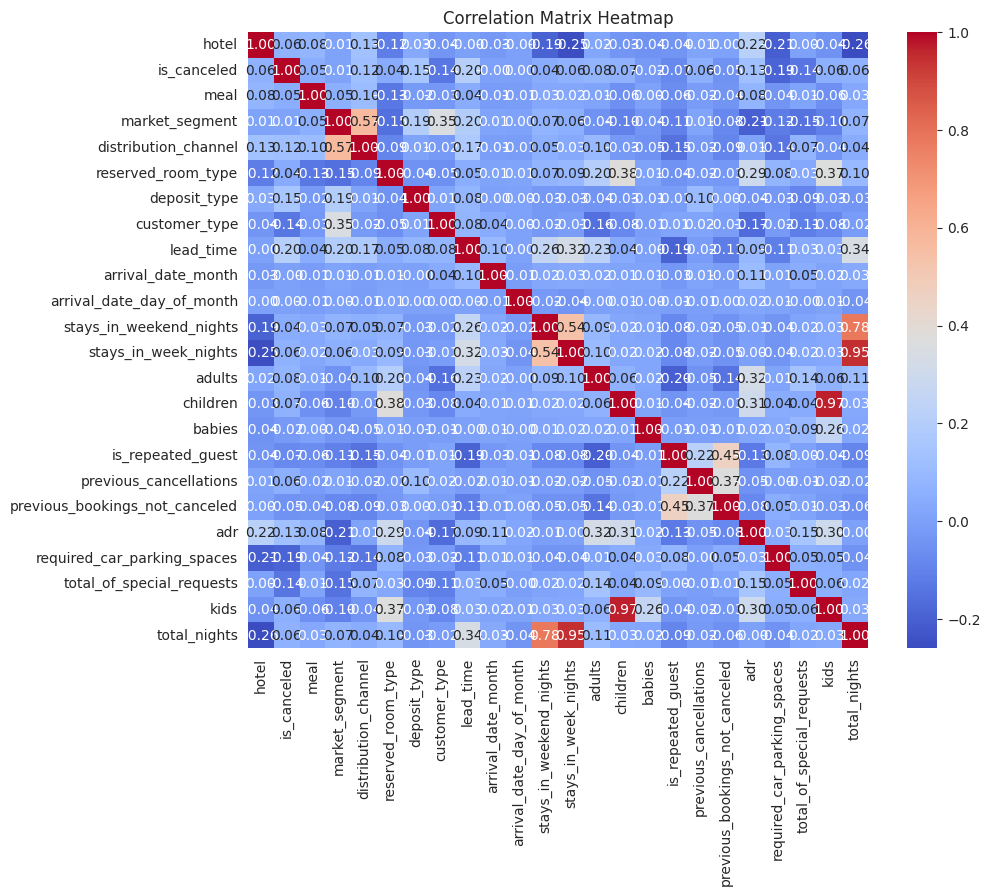

In [246]:
import seaborn as sns
cor_mat = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [248]:
# X.to_excel('input_test.xlsx', index=False)

X = X.drop(columns=['is_canceled','arrival_date_day_of_month','arrival_date_month','kids','babies','add'])


In [249]:
X.columns

Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type', 'family',
       'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights'],
      dtype='object')

In [250]:
# y.to_excel('input_test2.xlsx', index=False)

In [251]:
X.shape, y.shape

((79362, 20), (79362,))

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [253]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,family,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests,total_nights
8155,0,0,5,2,1,0,2,0,5.793014,0,4,2,0.0,0,0,0,4.133565,0,0,4
100640,1,3,2,2,1,0,0,0,3.761200,0,1,2,0.0,0,0,0,4.700480,0,2,1
91419,1,0,2,2,2,0,0,0,3.871201,2,1,3,0.0,0,0,0,5.019265,0,2,3
21462,0,2,3,2,1,0,0,1,2.302585,1,1,2,1.0,0,0,0,4.244917,0,1,2
99913,1,0,3,2,1,0,0,0,3.871201,2,2,2,0.0,0,0,0,4.403666,0,0,4


In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc

def visualize_analytics(y_test, y_pred, model_name):
    y_test_binary = (y_test == 'canceled').astype(int)
    y_pred_binary = (y_pred == 'canceled').astype(int)

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    plt.subplot(1, 3, 2)
    precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_binary)
    pr_auc = auc(recall, precision)

    plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='darkorange', lw=2)
    plt.fill_between(recall, precision, alpha=0.2, color='darkorange')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    plt.show()
    report = classification_report(y_test, y_pred)
    print(f"Classification Report - {model_name}:\n{report}")


In [255]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [256]:
import joblib
lr = LogisticRegression()
history = lr.fit(X_train, y_train)

joblib.dump(lr, 'model_lr.joblib')

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7638708051577134
Confusion Matrix : 
[[ 2445  4615]
 [ 1007 15742]]
Classification Report : 
              precision    recall  f1-score   support

    canceled       0.71      0.35      0.47      7060
not canceled       0.77      0.94      0.85     16749

    accuracy                           0.76     23809
   macro avg       0.74      0.64      0.66     23809
weighted avg       0.75      0.76      0.73     23809



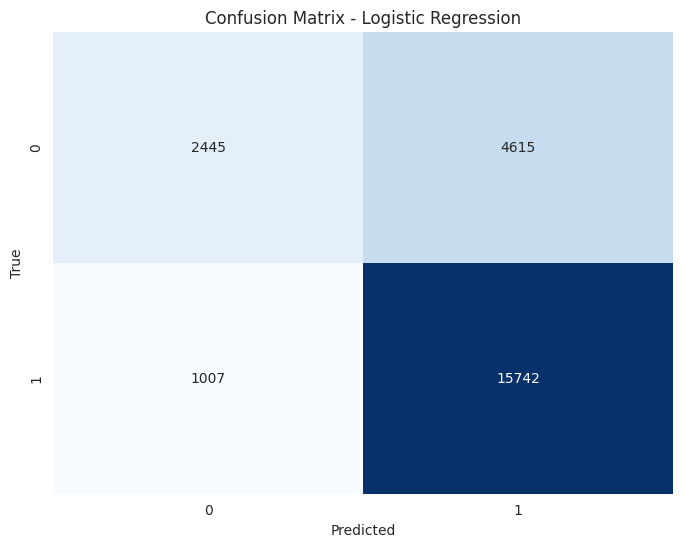

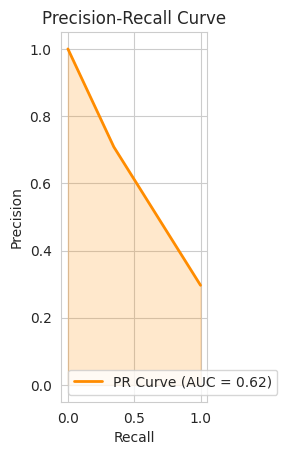

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

    canceled       0.71      0.35      0.47      7060
not canceled       0.77      0.94      0.85     16749

    accuracy                           0.76     23809
   macro avg       0.74      0.64      0.66     23809
weighted avg       0.75      0.76      0.73     23809



In [257]:
visualize_analytics(y_test, y_pred_lr, 'Logistic Regression')

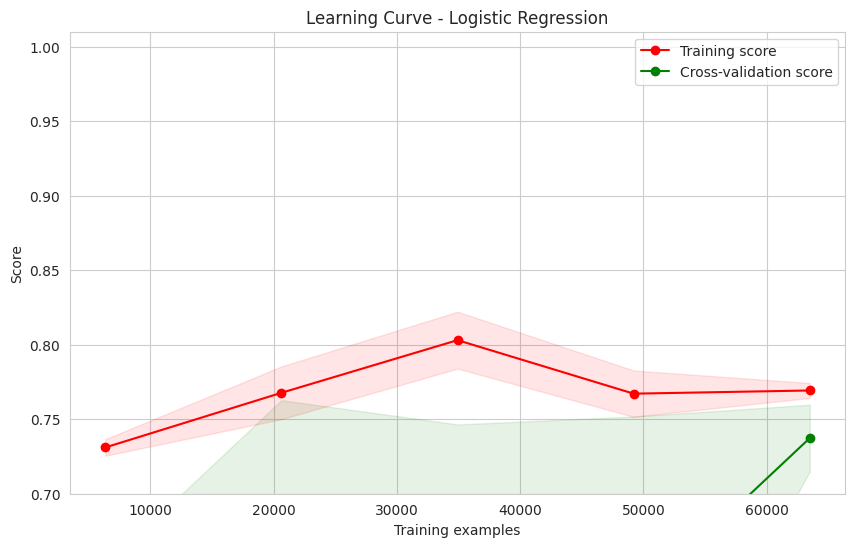

In [258]:
plot_learning_curve(lr, "Learning Curve - Logistic Regression", X, y, ylim=(0.7, 1.01), cv=5, n_jobs=2)
plt.show()

In [259]:
import joblib
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

joblib.dump(knn, 'model_knn.joblib')

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.7484984669662733
Confusion Matrix : 
[[ 3396  3664]
 [ 2324 14425]]
Classification Report : 
              precision    recall  f1-score   support

    canceled       0.59      0.48      0.53      7060
not canceled       0.80      0.86      0.83     16749

    accuracy                           0.75     23809
   macro avg       0.70      0.67      0.68     23809
weighted avg       0.74      0.75      0.74     23809



In [260]:
# plot_learning_curve(knn, "Learning Curve - KNN", X, y, ylim=(0.7, 1.01), cv=5, n_jobs=2)
# plt.show()

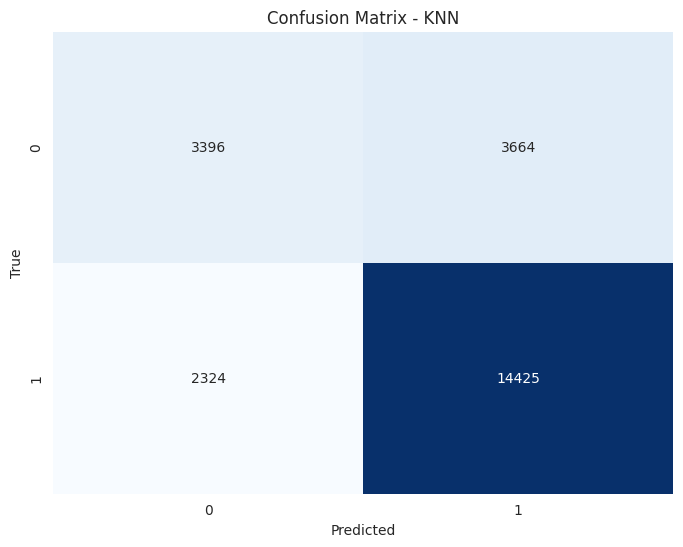

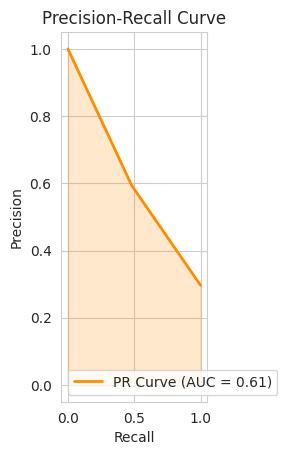

Classification Report - KNN:
              precision    recall  f1-score   support

    canceled       0.59      0.48      0.53      7060
not canceled       0.80      0.86      0.83     16749

    accuracy                           0.75     23809
   macro avg       0.70      0.67      0.68     23809
weighted avg       0.74      0.75      0.74     23809



In [261]:
visualize_analytics(y_test, y_pred_knn, 'KNN')

In [262]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Train the SVM model
svc = SVC()
svc.fit(X_train, y_train)
joblib.dump(svc, 'model_svc.joblib')

# Make predictions on the test data
y_pred_svm = svc.predict(X_test)

# Evaluate the model's performance
acc_svm = accuracy_score(y_test, y_pred_svm)
conf_svm = confusion_matrix(y_test, y_pred_svm)
clf_report_svm = classification_report(y_test, y_pred_svm)

print(f"Accuracy Score of SVM is : {acc_svm}")
print(f"Confusion Matrix : \n{conf_svm}")
print(f"Classification Report : \n{clf_report_svm}")

Accuracy Score of SVM is : 0.7761770758956698
Confusion Matrix : 
[[ 2742  4318]
 [ 1011 15738]]
Classification Report : 
              precision    recall  f1-score   support

    canceled       0.73      0.39      0.51      7060
not canceled       0.78      0.94      0.86     16749

    accuracy                           0.78     23809
   macro avg       0.76      0.66      0.68     23809
weighted avg       0.77      0.78      0.75     23809



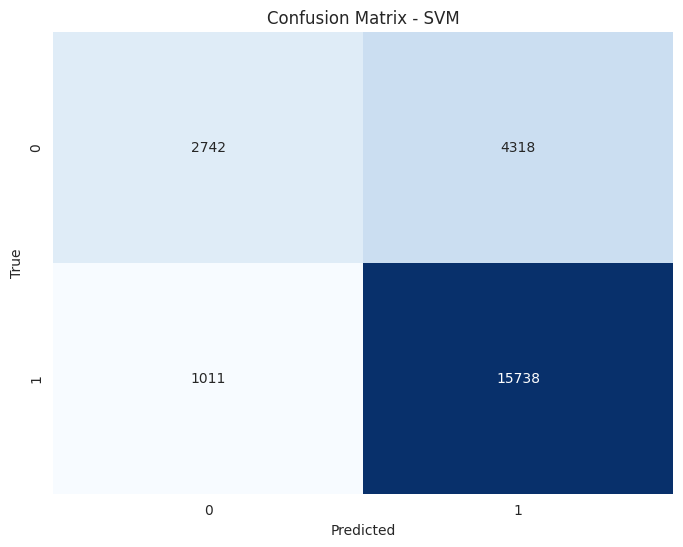

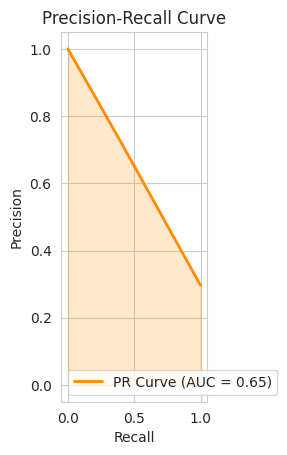

Classification Report - SVM:
              precision    recall  f1-score   support

    canceled       0.73      0.39      0.51      7060
not canceled       0.78      0.94      0.86     16749

    accuracy                           0.78     23809
   macro avg       0.76      0.66      0.68     23809
weighted avg       0.77      0.78      0.75     23809



In [263]:
visualize_analytics(y_test, y_pred_svm, 'SVM')

In [264]:
#plot_learning_curve(svc, "Learning Curve - SVM", X, y, ylim=(0.7, 1.01), cv=5,n_jobs=2)
#plt.show()

In [265]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Gaussian Naive Bayes model
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

joblib.dump(naive_bayes, 'model_nb.joblib')
# Predict using the test set
y_pred_nb = naive_bayes.predict(X_test)

# Calculate accuracy
acc_nb = accuracy_score(y_test, y_pred_nb)

# Calculate confusion matrix
conf_nb = confusion_matrix(y_test, y_pred_nb)

# Generate classification report
clf_report_nb = classification_report(y_test, y_pred_nb)

print(f"Accuracy Score of Naive Bayes is : {acc_nb}")
print(f"Confusion Matrix : \n{conf_nb}")
print(f"Classification Report : \n{clf_report_nb}")


Accuracy Score of Naive Bayes is : 0.4172371792179428
Confusion Matrix : 
[[ 6904   156]
 [13719  3030]]
Classification Report : 
              precision    recall  f1-score   support

    canceled       0.33      0.98      0.50      7060
not canceled       0.95      0.18      0.30     16749

    accuracy                           0.42     23809
   macro avg       0.64      0.58      0.40     23809
weighted avg       0.77      0.42      0.36     23809



In [266]:
#plot_learning_curve(naive_bayes, "Learning Curve - Naive Bayes", X, y, ylim=(0.7, 1.01), cv=5, n_jobs=2)
#plt.show()

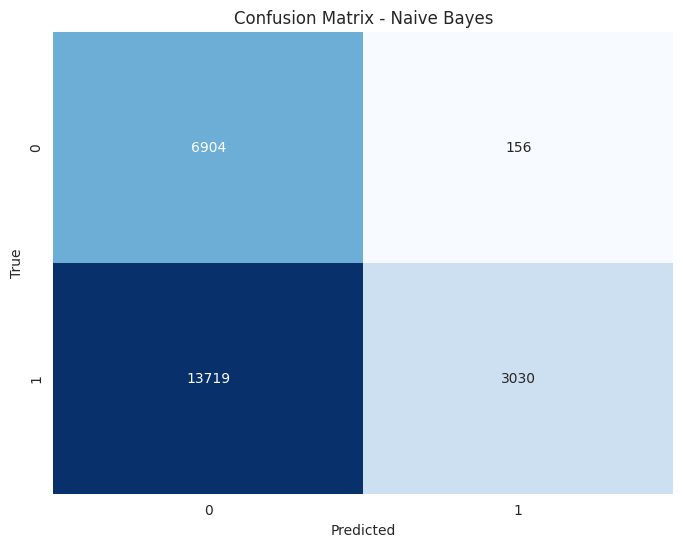

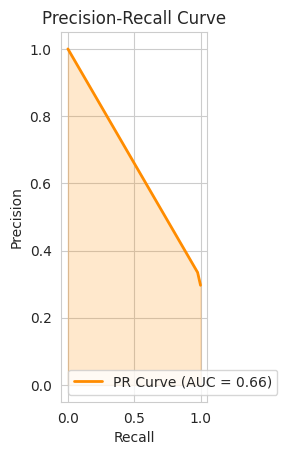

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

    canceled       0.33      0.98      0.50      7060
not canceled       0.95      0.18      0.30     16749

    accuracy                           0.42     23809
   macro avg       0.64      0.58      0.40     23809
weighted avg       0.77      0.42      0.36     23809



In [267]:
visualize_analytics(y_test, y_pred_nb, 'Naive Bayes')

In [268]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)
joblib.dump(rd_clf, 'model_rd.joblib')
y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.7770170943760762
Confusion Matrix : 
[[ 3703  3357]
 [ 1952 14797]]
Classification Report : 
              precision    recall  f1-score   support

    canceled       0.65      0.52      0.58      7060
not canceled       0.82      0.88      0.85     16749

    accuracy                           0.78     23809
   macro avg       0.73      0.70      0.72     23809
weighted avg       0.77      0.78      0.77     23809



In [269]:
#plot_learning_curve(rd_clf, "Learning Curve - Random Forest", X, y, ylim=(0.7, 1.01), cv=5, n_jobs=2)
#plt.show()

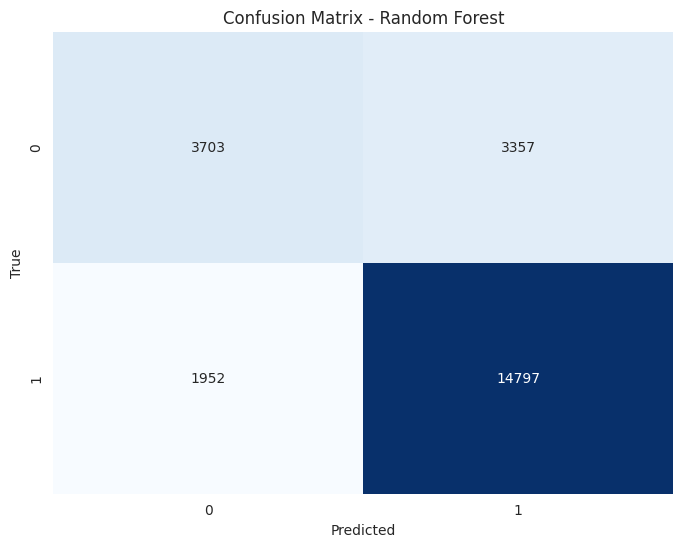

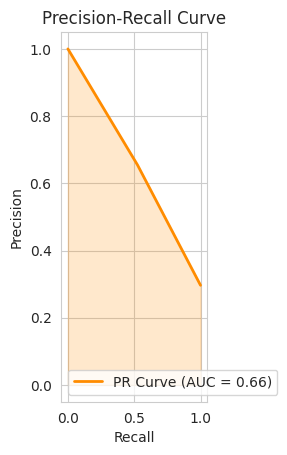

Classification Report - Random Forest:
              precision    recall  f1-score   support

    canceled       0.65      0.52      0.58      7060
not canceled       0.82      0.88      0.85     16749

    accuracy                           0.78     23809
   macro avg       0.73      0.70      0.72     23809
weighted avg       0.77      0.78      0.77     23809



In [270]:
visualize_analytics(y_test, y_pred_rd_clf, 'Random Forest')

In [271]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
joblib.dump(dtc, 'model_dtc.joblib')
y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.722373892225629
Confusion Matrix : 
[[ 3824  3236]
 [ 3374 13375]]
Classification Report : 
              precision    recall  f1-score   support

    canceled       0.53      0.54      0.54      7060
not canceled       0.81      0.80      0.80     16749

    accuracy                           0.72     23809
   macro avg       0.67      0.67      0.67     23809
weighted avg       0.72      0.72      0.72     23809



In [272]:
#plot_learning_curve(dtc, "Learning Curve - Decision Tree", X, y, ylim=(0.7, 1.01), cv=5, n_jobs=2)
#plt.show()

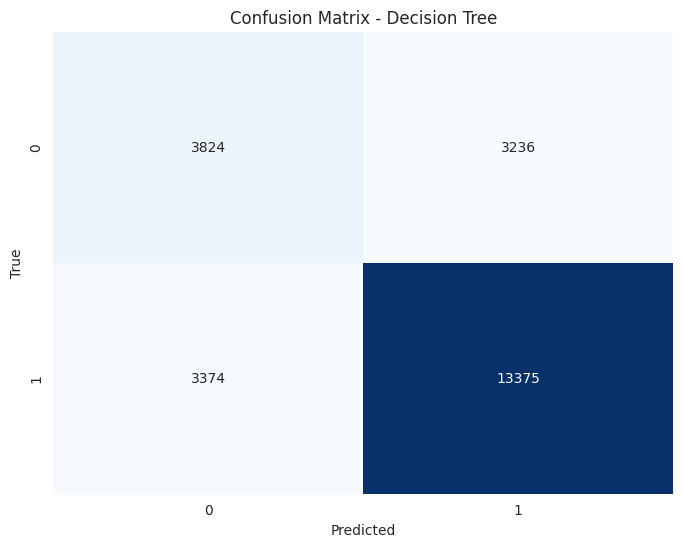

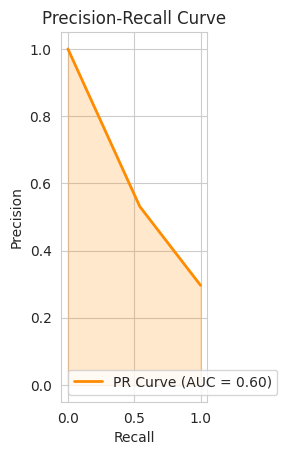

Classification Report - Decision Tree:
              precision    recall  f1-score   support

    canceled       0.53      0.54      0.54      7060
not canceled       0.81      0.80      0.80     16749

    accuracy                           0.72     23809
   macro avg       0.67      0.67      0.67     23809
weighted avg       0.72      0.72      0.72     23809



In [273]:
visualize_analytics(y_test, y_pred_dtc, 'Decision Tree')